# mount drive and unzip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/MyDrive/anomaly_detection_dataset-20241202T135512Z-001.zip" -d "/content/images"


!unzip -q "/content/drive/MyDrive/UNet-PyTorch.zip" -d "/content/images"

!ls "/content/images"


unzip:  cannot find or open /content/drive/MyDrive/anomaly_detection_dataset-20241202T135512Z-001.zip, /content/drive/MyDrive/anomaly_detection_dataset-20241202T135512Z-001.zip.zip or /content/drive/MyDrive/anomaly_detection_dataset-20241202T135512Z-001.zip.ZIP.
UNet-PyTorch


In [ ]:
import cv2
import matplotlib.pyplot as plt


# making labelled dataset from the image folders

In [ ]:
import os
import pandas as pd
from google.colab import drive


source_bad = '/content/images/anomaly_detection_dataset/bad'
source_good = '/content/images/anomaly_detection_dataset/good'

data = []

for file_name in os.listdir(source_bad):
    file_path = os.path.join(source_bad, file_name)
    if os.path.isfile(file_path):
        data.append([file_path, 0])  # 0 for 'bad'

for file_name in os.listdir(source_good):
    file_path = os.path.join(source_good, file_name)
    if os.path.isfile(file_path):
        data.append([file_path, 1])  # 1 for 'good'

df = pd.DataFrame(data, columns=['image_path', 'label'])

csv_path = '/content/labels.csv'
df.to_csv(csv_path, index=False)
print(f"Labeled dataset saved to {csv_path}")

print(df.head())


Labeled dataset saved to /content/labels.csv
                                          image_path  label
0  /content/images/anomaly_detection_dataset/bad/...      0
1  /content/images/anomaly_detection_dataset/bad/...      0
2  /content/images/anomaly_detection_dataset/bad/...      0
3  /content/images/anomaly_detection_dataset/bad/...      0
4  /content/images/anomaly_detection_dataset/bad/...      0


In [ ]:
# some files in the image folder were .dstore etc etc...we need to remove them
import cv2
import pandas as pd

df = pd.read_csv('/content/labels.csv')

img_height, img_width = 64, 64
X = []
y = []

# to keep track of rows with missing images
valid_rows = []

for index, row in df.iterrows():
    image = cv2.imread(row['image_path'])
    if image is None:
        print(f"Warning: Image at {row['image_path']} could not be loaded. Removing entry.")
    else:

        valid_rows.append(index)


df_cleaned = df.loc[valid_rows]


df_cleaned.to_csv('/content/cleaned_labels.csv', index=False)




Cleaned CSV saved as 'cleaned_labels.csv'.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/cleaned_labels.csv')

# Resize the image to common dimension
img_height, img_width = 100, 100
X = []
y = []
for index, row in df.iterrows():
    image = cv2.imread(row['image_path'])
    image = cv2.resize(image, (img_height, img_width))
    X.append(image)
    y.append(row['label'])

X = np.array(X)
y = np.array(y)

X = X.astype('float32') / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.8011 - loss: 0.6190 - val_accuracy: 0.8183 - val_loss: 0.3919
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8389 - loss: 0.3677 - val_accuracy: 0.8538 - val_loss: 0.3335
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8737 - loss: 0.2949 - val_accuracy: 0.8846 - val_loss: 0.2781
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9054 - loss: 0.2401 - val_accuracy: 0.8702 - val_loss: 0.2892
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9265 - loss: 0.2012 - val_accuracy: 0.9308 - val_loss: 0.1934
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9552 - loss: 0.1469 - val_accuracy: 0.9394 - val_loss: 0.1717
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9597 - loss: 0.1175 - val_accuracy: 0.9510 - val_loss: 0.1587
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9629 - loss: 0.1173 - val_accuracy: 0.9471 - 

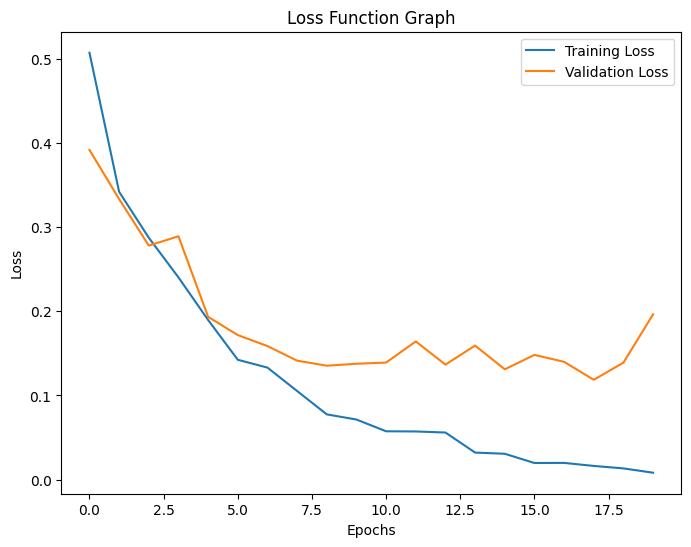

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │       2,166,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,558,917 (25.02 MB)

 Trainable params: 2,186,305 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,372,612 (16.68 MB)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# see here the model architecture
model.summary()

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score


y_pred= model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
report = classification_report(y_test, y_pred, target_names=["Good Image", "Bad Image"])
print("Classification Report:\n", report)

# bad_image_precision = precision_score(y_test, y_pred, pos_label=1)
# bad_image_recall = recall_score(y_test, y_pred, pos_label=1)




33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Classification Report:
               precision    recall  f1-score   support

  Good Image       0.97      0.82      0.89       223
   Bad Image       0.95      0.99      0.97       817

    accuracy                           0.95      1040
   macro avg       0.96      0.90      0.93      1040
weighted avg       0.96      0.95      0.95      1040



In [ ]:
model.save('/content/cnn1_model_weights.h5')


# prediction

In [ ]:
import cv2
import numpy as np

def preprocess_image(image_path, img_height=100, img_width=100):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")
    image = cv2.resize(image, (img_height, img_width))
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image


unseen_image_path = '/content/images/anomaly_detection_dataset/bad/16_08_2024_17_36_21.335061_classifier_input.png'  # Replace with the actual path
preprocessed_image = preprocess_image(unseen_image_path)


prediction = model.predict(preprocessed_image)


predicted_class = 1 if prediction[0] > 0.5 else 0
print(f"Prediction: {'Good' if predicted_class == 1 else 'Bad'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: Good


# resnet and alex - oops!! :( not working - either crashing or not giving good accuracy

In [ ]:
# # Resnet 50

# import tensorflow as tf
# from tensorflow.keras import layers, models, applications
# from tensorflow.keras.models import Model
# import pandas as pd
# import numpy as np
# import cv2
# from sklearn.model_selection import train_test_split

# # Load the dataset
# df = pd.read_csv('/content/cleaned_labels.csv')

# # Preprocess the image data
# img_height, img_width = 224, 224  # ResNet50 expects 224x224 images
# X = []
# y = []
# for index, row in df.iterrows():
#     image = cv2.imread(row['image_path'])
#     image = cv2.resize(image, (img_height, img_width))
#     X.append(image)
#     y.append(row['label'])

# X = np.array(X)
# y = np.array(y)

# # Normalize pixel values
# X = X.astype('float32') / 255.0

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert labels to categorical for binary classification
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# # Load the ResNet50 model
# base_model = applications.ResNet50(
#     weights='imagenet',  # Use pre-trained weights
#     include_top=False,  # Exclude the top classification layer
#     input_shape=(img_height, img_width, 3)  # Input shape for the model
# )

# # Freeze the base model layers
# base_model.trainable = False

# # Add custom classification layers
# x = layers.Flatten()(base_model.output)
# x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# output_layer = layers.Dense(2, activation='softmax')(x)  # Binary classification with 2 neurons

# # Define the final model
# model = Model(inputs=base_model.input, outputs=output_layer)

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))  # Adjust epochs and batch_size

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")


In [ ]:
# #alex net - crashing

# import tensorflow as tf
# from tensorflow.keras import layers, models
# import pandas as pd
# import numpy as np
# import cv2
# from sklearn.model_selection import train_test_split

# # Load the dataset
# df = pd.read_csv('/content/cleaned_labels.csv')

# # Preprocess the image data
# img_height, img_width = 227, 227  # AlexNet expects 227x227 images
# X = []
# y = []
# for index, row in df.iterrows():
#     image = cv2.imread(row['image_path'])
#     image = cv2.resize(image, (img_height, img_width))
#     X.append(image)
#     y.append(row['label'])

# X = np.array(X)
# y = np.array(y)

# # Normalize pixel values
# X = X.astype('float32') / 255.0

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert labels to categorical for binary classification
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# # Define AlexNet model
# # Define AlexNet model with Input layer
# model = models.Sequential([
#     layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape
#     layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu'),
#     layers.MaxPooling2D((3, 3), strides=(2, 2)),
#     layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
#     layers.MaxPooling2D((3, 3), strides=(2, 2)),
#     layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D((3, 3), strides=(2, 2)),
#     layers.Flatten(),
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(4096, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(2, activation='softmax')  # Binary classification
# ])


# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))  # Adjust epochs and batch_size

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")


# MASK R-CNN BEGINS

# creating bbox xml

In [ ]:
import os
import cv2
import xml.etree.ElementTree as ET

def create_voc_xml(image_name, image_size, bboxes, output_dir):
    """
    Creates an XML annotation file in PASCAL VOC format.

    Args:
        image_name (str): Name of the image (e.g., "image1.jpg").
        image_size (tuple): Size of the image as (height, width, depth).
        bboxes (list): List of bounding boxes as [(xmin, ymin, xmax, ymax)].
        output_dir (str): Directory to save the XML file.
    """
    annotation = ET.Element("annotation")

    # Folder
    folder = ET.SubElement(annotation, "folder")
    folder.text = "dataset"

    # Filename
    filename = ET.SubElement(annotation, "filename")
    filename.text = image_name

    # Size
    size = ET.SubElement(annotation, "size")
    width = ET.SubElement(size, "width")
    width.text = str(image_size[1])
    height = ET.SubElement(size, "height")
    height.text = str(image_size[0])
    depth = ET.SubElement(size, "depth")
    depth.text = str(image_size[2])

    # For each bounding box
    for bbox in bboxes:
        obj = ET.SubElement(annotation, "object")
        name = ET.SubElement(obj, "name")
        name.text = "scratch"  # Class name
        pose = ET.SubElement(obj, "pose")
        pose.text = "Unspecified"
        truncated = ET.SubElement(obj, "truncated")
        truncated.text = "0"
        difficult = ET.SubElement(obj, "difficult")
        difficult.text = "0"

        # BBox coordinates
        bndbox = ET.SubElement(obj, "bndbox")
        xmin = ET.SubElement(bndbox, "xmin")
        xmin.text = str(bbox[0])
        ymin = ET.SubElement(bndbox, "ymin")
        ymin.text = str(bbox[1])
        xmax = ET.SubElement(bndbox, "xmax")
        xmax.text = str(bbox[2])
        ymax = ET.SubElement(bndbox, "ymax")
        ymax.text = str(bbox[3])

    # Save XML
    tree = ET.ElementTree(annotation)
    output_path = os.path.join(output_dir, os.path.splitext(image_name)[0] + ".xml")
    tree.write(output_path)
    print(f"Saved: {output_path}")


def masks_to_bboxes_and_xmls(mask_dir, image_dir, output_dir):
    """
    Converts binary masks to bounding boxes and saves annotations as PASCAL VOC XML files.

    Args:
        mask_dir (str): Directory containing binary mask images.
        image_dir (str): Directory containing the corresponding original images.
        output_dir (str): Directory to save XML annotation files.
    """
    os.makedirs(output_dir, exist_ok=True)

    mask_files = sorted(os.listdir(mask_dir))
    image_files = sorted(os.listdir(image_dir))

    for mask_file, image_file in zip(mask_files, image_files):
        mask_path = os.path.join(mask_dir, mask_file)
        image_path = os.path.join(image_dir, image_file)
        print(f"Image Path: {image_path} Exists? {os.path.exists(image_path)}")
        print(f"Mask Path: {mask_path} Exists? {os.path.exists(mask_path)}")


        # Load mask and image
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.imread(image_path)
        height, width, depth = image.shape

        # Find contours (white regions in the mask)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        bboxes = []
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            bboxes.append((x, y, x + w, y + h))

        # Create XML annotation
        create_voc_xml(image_file, (height, width, depth), bboxes, output_dir)


# Example usage
mask_dir = "/content/images/UNet-PyTorch/data/train_masks"  # Replace with your binary masks directory
image_dir = "/content/images/UNet-PyTorch/data/train"  # Replace with your original images directory
output_dir = "/content/xmls"  # Replace with the directory to save XML files
masks_to_bboxes_and_xmls(mask_dir, image_dir, output_dir)


Image Path: /content/images/UNet-PyTorch/data/train/03_08_2024_16_54_38.244099_classifier_input.png Exists? True
Mask Path: /content/images/UNet-PyTorch/data/train_masks/03_08_2024_16_54_38.244099_classifier_input.png Exists? True
Saved: /content/xmls/03_08_2024_16_54_38.244099_classifier_input.xml
Image Path: /content/images/UNet-PyTorch/data/train/03_08_2024_16_55_10.563042_classifier_input.png Exists? True
Mask Path: /content/images/UNet-PyTorch/data/train_masks/03_08_2024_16_55_10.563042_classifier_input.png Exists? True
Saved: /content/xmls/03_08_2024_16_55_10.563042_classifier_input.xml
Image Path: /content/images/UNet-PyTorch/data/train/03_08_2024_16_59_07.698036_classifier_input.png Exists? True
Mask Path: /content/images/UNet-PyTorch/data/train_masks/03_08_2024_16_59_07.698036_classifier_input.png Exists? True
Saved: /content/xmls/03_08_2024_16_59_07.698036_classifier_input.xml
Image Path: /content/images/UNet-PyTorch/data/train/03_08_2024_17_12_41.304965_classifier_input.png 

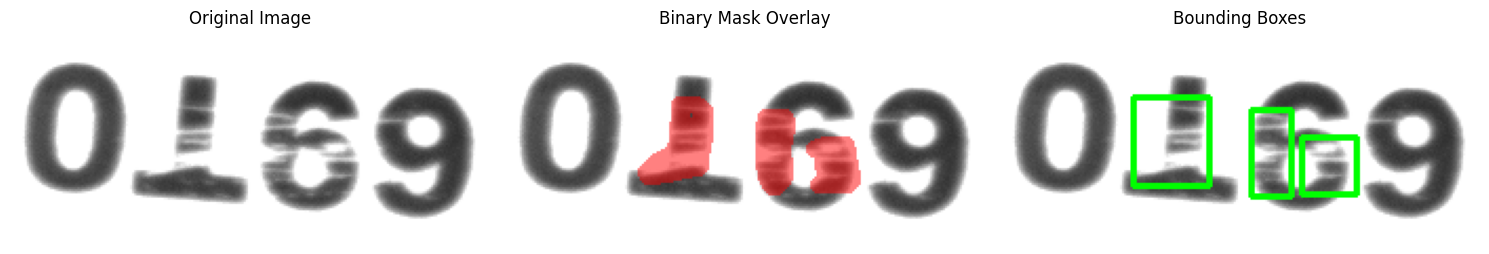

In [ ]:
import os
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

def parse_voc_xml(xml_file):
    """
    Parse a PASCAL VOC XML file to extract bounding boxes.

    Args:
        xml_file (str): Path to the XML file.

    Returns:
        List of bounding boxes [(xmin, ymin, xmax, ymax)].
    """
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    for obj in root.findall("object"):
        bbox = obj.find("bndbox")
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)
        bboxes.append((xmin, ymin, xmax, ymax))
    return bboxes

def visualize_mask_and_bboxes(image_path, mask_path, xml_path):
    """
    Visualizes the original image, binary mask, and bounding boxes.

    Args:
        image_path (str): Path to the original image.
        mask_path (str): Path to the binary mask image.
        xml_path (str): Path to the bounding box XML file.
    """
    # Load image and mask
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Could not load image: {image_path}")
        return

    if mask is None:
        print(f"Could not load mask: {mask_path}")
        return

    # Get bounding boxes from XML
    bboxes = parse_voc_xml(xml_path)

    # Create a copy of the image to overlay bounding boxes
    image_with_bboxes = image.copy()

    # Draw bounding boxes
    for (xmin, ymin, xmax, ymax) in bboxes:
        cv2.rectangle(image_with_bboxes, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Overlay the mask on the image
    overlay = image.copy()
    overlay[mask > 0] = (0, 0, 255)  # Highlight mask region in red
    overlay = cv2.addWeighted(overlay, 0.5, image, 0.5, 0)

    # Plot the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Binary Mask Overlay")
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Bounding Boxes")
    plt.imshow(cv2.cvtColor(image_with_bboxes, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
image_path = "/content/images/UNet-PyTorch/data/train/03_08_2024_16_54_38.244099_classifier_input.png"  # Replace with your image path
mask_path = "/content/images/UNet-PyTorch/data/train_masks/03_08_2024_16_54_38.244099_classifier_input.png"  # Replace with your mask path
xml_path = "/content/xmls/03_08_2024_16_54_38.244099_classifier_input.xml"  # Replace with your XML file path

visualize_mask_and_bboxes(image_path, mask_path, xml_path)


# creating annotation json file

In [ ]:
import os
import cv2
import json

def masks_to_json_annotations(mask_dir, image_dir, output_path):
    """
    Converts binary masks to JSON annotations in the specified format.

    Args:
        mask_dir (str): Directory containing binary mask images.
        image_dir (str): Directory containing the corresponding original images.
        output_path (str): Path to save the JSON annotation file.
    """
    annotations = {}

    mask_files = sorted(os.listdir(mask_dir))
    image_files = sorted(os.listdir(image_dir))

    for mask_file, image_file in zip(mask_files, image_files):
        mask_path = os.path.join(mask_dir, mask_file)
        image_path = os.path.join(image_dir, image_file)

        # Load mask
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if mask is None:
            print(f"Failed to load mask: {mask_path}")
            continue

        # Load image to get metadata
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        file_size = os.path.getsize(image_path)
        height, width, _ = image.shape

        # Find contours (white regions in the mask)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        regions = []
        for contour in contours:
            all_points_x = contour[:, 0, 0].tolist()  # Extract x-coordinates
            all_points_y = contour[:, 0, 1].tolist()  # Extract y-coordinates
            regions.append({
                "shape_attributes": {
                    "name": "polyline",
                    "all_points_x": all_points_x,
                    "all_points_y": all_points_y
                },
                "region_attributes": {
                    "scratch": "scratch"
                }
            })

        # Create annotation entry
        annotations[image_file + str(file_size)] = {
            "filename": image_file,
            "size": file_size,
            "regions": regions,
            "file_attributes": {}
        }

    # Save JSON
    with open(output_path, 'w') as json_file:
        json.dump(annotations, json_file, indent=4)
    print(f"Annotations saved to: {output_path}")


mask_dir = "/content/images/UNet-PyTorch/data/train_masks"
image_dir = "/content/images/UNet-PyTorch/data/train"
output_path = "/content/annotations.json"
masks_to_json_annotations(mask_dir, image_dir, output_path)


Annotations saved to: /content/annotations.json


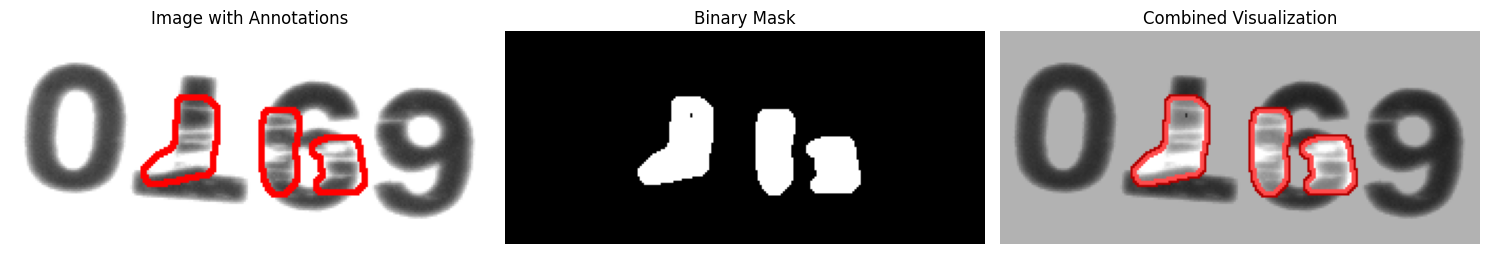

In [ ]:
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np

def visualize_annotations(image_path, mask_path, annotation_json):
    """
    Visualizes annotations from a JSON file over the original image and binary mask.

    Args:
        image_path (str): Path to the original image.
        mask_path (str): Path to the binary mask.
        annotation_json (str): Path to the annotation JSON file.
    """

    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    with open(annotation_json, "r") as f:
        annotations = json.load(f)


    image_key = list(annotations.keys())[0]
    annotation_data = annotations[image_key]


    for region in annotation_data["regions"]:
        all_points_x = region["shape_attributes"]["all_points_x"]
        all_points_y = region["shape_attributes"]["all_points_y"]


        points = np.array(list(zip(all_points_x, all_points_y)), dtype=np.int32)


        cv2.polylines(image_rgb, [points], isClosed=True, color=(255, 0, 0), thickness=2)


    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image_rgb)
    axes[0].set_title("Image with Annotations")
    axes[0].axis("off")

    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title("Binary Mask")
    axes[1].axis("off")

    combined = cv2.addWeighted(image_rgb, 0.7, cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB), 0.3, 0)
    axes[2].imshow(combined)
    axes[2].set_title("Combined Visualization")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()


image_path = "/content/images/UNet-PyTorch/data/train/03_08_2024_16_54_38.244099_classifier_input.png"
mask_path = "/content/images/UNet-PyTorch/data/train_masks/03_08_2024_16_54_38.244099_classifier_input.png"
annotation_json = "/content/annotations.json"

visualize_annotations(image_path, mask_path, annotation_json)


# Training faster mrcnn

In [ ]:
import os
import json
import numpy as np
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import cv2
from torchvision import transforms

class ScratchDataset(Dataset):
    def __init__(self, json_file, img_dir, transform=None):
        with open(json_file, 'r') as f:
            self.annotations = json.load(f)
        self.img_dir = img_dir
        self.transform = transform
        self.image_ids = list(self.annotations.keys())

        # Default transform if none provided
        if self.transform is None:
            self.transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])
            ])

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_id = self.image_ids[idx]
        ann_data = self.annotations[img_id]

        # Load image
        img_path = os.path.join(self.img_dir, ann_data['filename'])
        img = Image.open(img_path).convert("RGB")

        # Get image dimensions before transform
        width, height = img.size

        # Create mask
        masks = []
        boxes = []
        labels = []

        for region in ann_data['regions']:
            # Convert polyline to mask
            points_x = region['shape_attributes']['all_points_x']
            points_y = region['shape_attributes']['all_points_y']

            # Create binary mask from polyline
            mask = np.zeros((height, width), dtype=np.uint8)
            points = np.array(list(zip(points_x, points_y)), dtype=np.int32)
            cv2.fillPoly(mask, [points], 1)

            # Get bounding box
            x_min = min(points_x)
            x_max = max(points_x)
            y_min = min(points_y)
            y_max = max(points_y)

            # Ensure boxes are not empty
            if x_min < x_max and y_min < y_max:
                boxes.append([x_min, y_min, x_max, y_max])
                masks.append(mask)
                labels.append(1)  # 1 for scratch class

        # Handle case where no valid boxes were found
        if not boxes:
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            masks = torch.zeros((0, height, width), dtype=torch.uint8)
            labels = torch.zeros((0,), dtype=torch.int64)
        else:
            # Convert to tensor format
            boxes = torch.as_tensor(boxes, dtype=torch.float32)
            labels = torch.as_tensor(labels, dtype=torch.int64)
            masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        iscrowd = torch.zeros((len(boxes),), dtype=torch.int64)

        target = {
            'boxes': boxes,
            'labels': labels,
            'masks': masks,
            'image_id': image_id,
            'area': area,
            'iscrowd': iscrowd
        }

        # Transform the image
        img = self.transform(img)

        return img, target

def get_model_instance_segmentation(num_classes):
    # Load pre-trained model
    model = maskrcnn_resnet50_fpn(pretrained=True)

    # Get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features

    # Replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # Get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256

    # Replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                      hidden_layer,
                                                      num_classes)

    return model

def train_one_epoch(model, optimizer, data_loader, device):
    model.train()
    total_loss = 0

    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()

    return total_loss / len(data_loader)

In [ ]:
# Set device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Create dataset
dataset = ScratchDataset(
    json_file='/content/annotations.json',
    img_dir='/content/images/UNet-PyTorch/data/train'
)

# Create data loader
data_loader = DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    collate_fn=lambda x: tuple(zip(*x))
)

# Create model
model = get_model_instance_segmentation(num_classes=2)  # Background + scratch
model.to(device)

# Create optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    loss = train_one_epoch(model, optimizer, data_loader, device)
    print(f"Epoch: {epoch}, Loss: {loss}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:02<00:00, 71.8MB/s]
<ipython-input-4-96d1d447e320>:80: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider conver

Epoch: 0, Loss: 0.8544560224445242
Epoch: 1, Loss: 0.694292642568287


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import cv2

def predict_and_visualize(model, image_path, device, confidence_threshold=0.5):
    # Load and transform image
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
    ])

    # Transform image
    x = transform(image)

    # Move to device and add batch dimension
    x = x.to(device)
    x = x.unsqueeze(0)

    # Set model to evaluation mode
    model.eval()

    with torch.no_grad():
        predictions = model(x)

    # Convert image back to numpy for visualization
    image_np = np.array(image)

    # Create a mask overlay
    overlay = image_np.copy()
    mask_overlay = np.zeros_like(image_np)

    # Process predictions
    for idx, score in enumerate(predictions[0]['scores']):
        if score > confidence_threshold:
            mask = predictions[0]['masks'][idx, 0].cpu().numpy()
            mask = (mask > 0.5).astype(np.uint8)

            # Create colored mask (red with 50% transparency)
            mask_overlay[mask == 1] = [255, 0, 0]  # Red color

    # Blend the original image with the mask
    alpha = 0.5
    cv2.addWeighted(mask_overlay, alpha, overlay, 1 - alpha, 0, overlay)

    # Plot results
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title('Original Image')
    plt.axis('off')

    # Image with mask overlay
    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title('Predicted Scratches')
    plt.axis('off')

    plt.show()

    # Print prediction confidence scores
    scores = predictions[0]['scores'].cpu().numpy()
    print("\nPrediction confidence scores:")
    for i, score in enumerate(scores):
        if score > confidence_threshold:
            print(f"Scratch {i+1}: {score:.3f}")

    return predictions

# Load the model and make prediction
def load_model_and_predict(model, image_path, device):
    # Load model
    # model = get_model_instance_segmentation(num_classes=2)
    # model.load_state_dict(torch.load(model_path))
    # model = model.to(device)

    # Make prediction
    return predict_and_visualize(model, image_path, device)

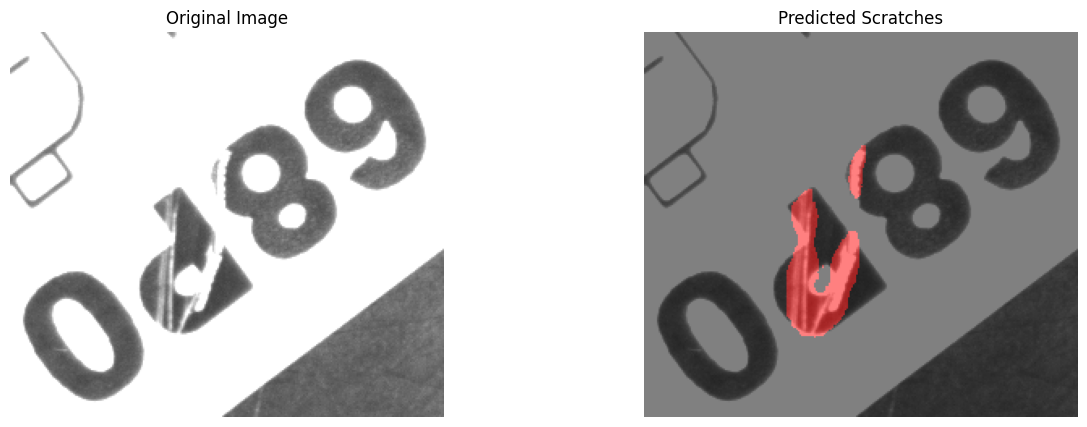


Prediction confidence scores:
Scratch 1: 0.729
Scratch 2: 0.715
Scratch 3: 0.632
Scratch 4: 0.568
Scratch 5: 0.551
Scratch 6: 0.536


In [ ]:
# Set device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Path to your saved model and test image
# model_path = 'path/to/your/saved/model.pth'
test_image_path = '/content/images/UNet-PyTorch/data/manual_test/Code03724.png'

# Load model and make prediction
predictions = load_model_and_predict(model, test_image_path, device)

# Save model

In [ ]:
# Save the model (best to save after training is complete)
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'epoch': epoch,
}, 'scratch_detector_model.pth')

# Predict on unseen images

<ipython-input-20-a5f99916e6ec>:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


Scratch 1 confidence: 0.919
Scratch 2 confidence: 0.738
Scratch 3 confidence: 0.546


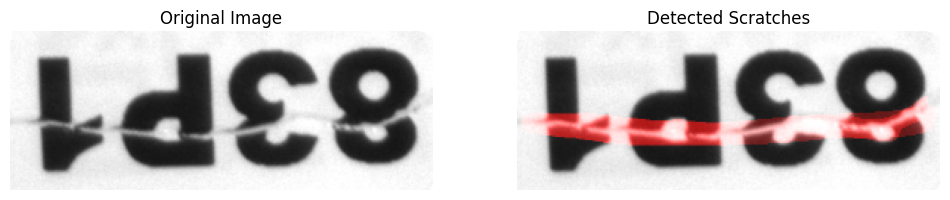

In [ ]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

def get_model_instance_segmentation(num_classes):
    model = maskrcnn_resnet50_fpn(pretrained=False)

    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # Mask predictor
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                      hidden_layer,
                                                      num_classes)
    return model

def load_model(model_path, device):
    model = get_model_instance_segmentation(num_classes=2)

    checkpoint = torch.load(model_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])

    model = model.to(device)
    model.eval()

    return model

def predict_image(model, image_path, device, confidence_threshold=0.5):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
    ])

    x = transform(image).unsqueeze(0).to(device)

    # Get predictions
    with torch.no_grad():
        predictions = model(x)

    image_np = np.array(image)
    overlay = image_np.copy()

    colors = [
        [255, 0, 0],    # Red
        [255, 0, 0],    # red
        [255, 0, 0],    # red
        [255, 0, 0],  # red
        [255, 0, 0],  # red
    ]

    for idx, score in enumerate(predictions[0]['scores']):
        if score > confidence_threshold:
            mask = predictions[0]['masks'][idx, 0].cpu().numpy()
            mask = (mask > 0.5).astype(np.uint8)


            color = colors[idx % len(colors)]
            mask_overlay = np.zeros_like(image_np)
            mask_overlay[mask == 1] = color


            alpha = 0.3
            cv2.addWeighted(mask_overlay, alpha, overlay, 1, 0, overlay)

            print(f"Scratch {idx+1} confidence: {score:.3f}")


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_np)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title('Detected Scratches')
    plt.axis('off')

    plt.show()

    return predictions


if __name__ == "__main__":

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Load model
    model = load_model('/content/scratch_detector_model.pth', device)

    # now predict
    image_path = '/content/23_09_2024_12_11_04.424919_cls_input.png'
    predictions = predict_image(model, image_path, device)